# Predicting Diabetes

### Import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

%matplotlib inline

### Load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
df.isnull().values.any()


False

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas dataframe
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-Cyan-Yellow-red-darkred => less to more correlated
                                                Expect a darkred line running from top left to bottom right
    """
    corr = df.corr()
    fix, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    

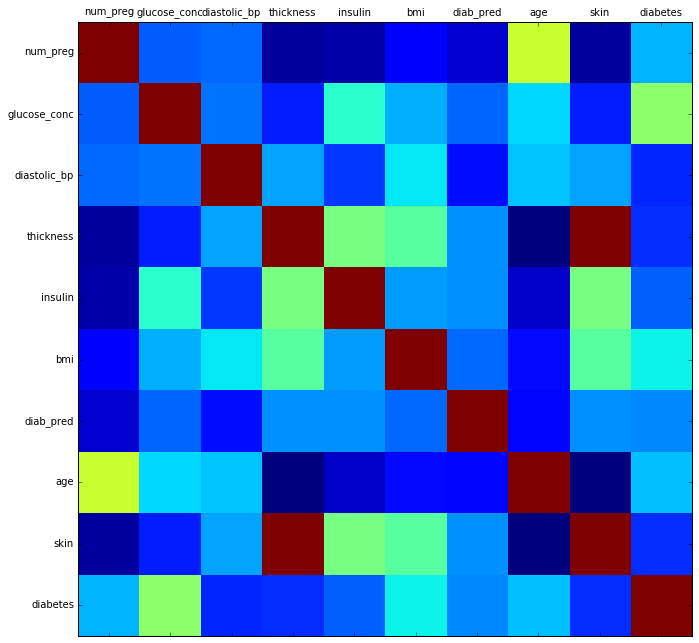

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


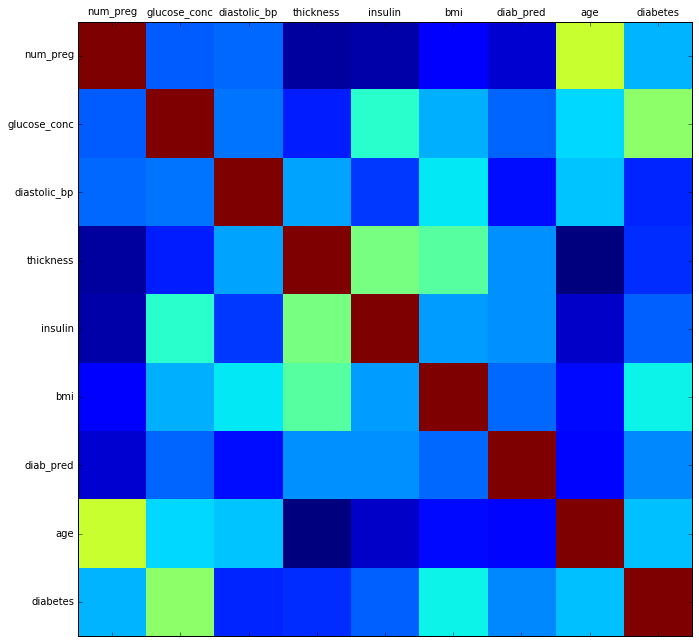

In [13]:
plot_corr(df)

### Check data types


In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0


In [15]:
diabetes_map = {True : 1, False : 0}

In [16]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [17]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check true/false ratio

In [18]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ num_obs) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


- from 50 algorithm, we can reduce for instance if we know what we expect : supervised machine learning algo must be used. So from 50 we shift to 28 algorithm.
- regression means that the result will be a continuous value, classification result is discrete. In our case, develop diabetes is binary, so it is classification. So : binary classification should be choosen => 20 algo remaining.

- remove "ensemble" (complex with multiple child algorithm) => 14 algo
- Basic / Enhanced algorithm : more complex, variation of basic algo
- Let's choose Basic : Naive Bayes, Logitic Regression or Decision Tree.

     In Naive Bayes, the algorithm makes the assumption that every feature has the same weight, probably not suited for us.
     Logistic regression : binary result. relationship between features are weighted
     Decision Tree : Binary tree, Node contains decision. Requires enough data to determine nodes and splits.

Naive Bayes  is finally selected during tutorial : . (simple to understand, fast, stable to data changes).



### Splitting the data
70% for training, 30% for testing.

In [19]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # predictor feature columns (8, m)
y = df[predicted_class_names].values #predicted class (1=true, 0=false) column (1xm)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We check to ensure we have the desired 70% train, 30 test split of the data

In [20]:
print("{:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


### verifying predicted value was split correctly

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1]) / len(df.index)) * 100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0]) / len(df.index)) * 100))
print("--")
print("Training True   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1 ]) / len(y_train) * 100)))
print("Training False  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0 ]) / len(y_train) * 100)))
print("--")
print("Test True   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1 ]) / len(y_test) * 100)))
print("Test Fals   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0 ]) / len(y_test) * 100)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)
--
Training True   : 188 (35.01%)
Training False  : 349 (64.99%)
--
Test True   : 80 (34.63%)
Test Fals   : 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values
( 0 for thickness, third row)

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
print("# rows in dataframe {}".format(len(df)))
print("# rows missing glucose_conc: {}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### What do we do with missing data... Ignore them, drop rows, or replace value (impute)
In our case, 374 missing insulin values on 768 rows... we can't drop the rows... IMPUTING.
We could derive the data from other column, but we need experts, so the simplest and most effective way in our case is to impute the mean of the column.


In [24]:
from sklearn.preprocessing import Imputer
#impute with mean all 0 readings

fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### training Initial Algorithm - Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [26]:
# predict valuyes using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics librry
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



### Performance on Testing Data

In [27]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))



Accuracy: 0.7359


In [28]:
### Metrics

In [29]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



### confusion matrix : 

| True Positive  | False Positive |
|----------------|----------------|
| False Negative | True Negative  |

#### Perfect classifier would lead to 

| 81  | 0   |
|-----|-----|
| 0   | 151 |


- Recall (in the table) = TP / (TP + FN) "True Positive Rate" How well the model is predicting positive when it is effectively positive
- Precision = TP / (TP + FP).

### Performance Improvement Options

- Adjust current Algorithm
- Get more data or improve data
- Improve Training
- Switch algorithm

## Random Forest. 

- Ensemble Algorithm
- Fits multiple trees with subsets of data
- Averages tree results to improve performance and control overfitting

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict training data

In [31]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


### Predict test data

In [32]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [33]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



### Typical example of overfitting ! (training great, testing poor)

 Let's try another basic algorithm
 
 ### Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics 
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))


Accuracy: 0.7446
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



1st max value of 0.613 occured at C=1.400


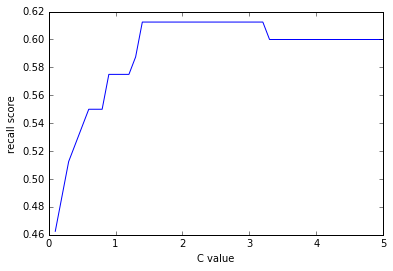

In [35]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [],[]

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

        

### Logistic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


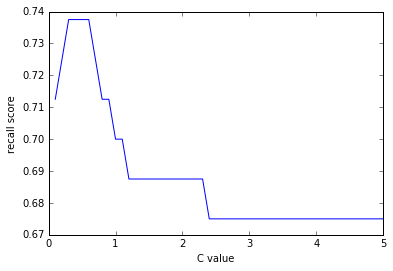

In [36]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [],[]

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

        

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)
# training metrics 
print("Best score C value : {}".format(best_score_C_val))
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

print(metrics.recall_score(y_test, lr_predict_test))


Best score C value : 0.30000000000000004
Accuracy: 0.7143
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


### Logistic Regression CV

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [41]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print("")
print("classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))



Accuracy: 0.6840
[[ 51  29]
 [ 44 107]]

classification Report
             precision    recall  f1-score   support

          1       0.54      0.64      0.58        80
          0       0.79      0.71      0.75       151

avg / total       0.70      0.68      0.69       231

